In [1]:
import os
import glob
import time
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from externel import seaborn as sns

def bin_CT(img, n_bins=1024):
#     data_vector = np.ravel(img)
    data_max = np.amax(img)
    data_min = np.amin(img)
    # print(data_max, data_min)
    data_squeezed = (img-data_min)/(data_max-data_min)
    data_extended = data_squeezed * n_bins
    data_discrete = data_extended // 1
#     print(data_discrete.shape)
    return np.asarray(list(data_discrete), dtype=np.int64)

train_dict = {}
train_dict["time_stamp"] = time.strftime("%Y-%m-%d_%H:%M:%S", time.localtime())
train_dict["project_name"] = "pixel_xyz"
train_dict["save_folder"] = "./project_dir/"+train_dict["project_name"]+"/"

train_dict["folder_X"] = "./data_dir/norm_MR/discrete/"
train_dict["folder_Y"] = "./data_dir/norm_CT_2/discrete/"

X_list = sorted(glob.glob(train_dict["folder_X"]+"*.nii.gz"))
Y_list = sorted(glob.glob(train_dict["folder_Y"]+"*.nii.gz"))

n_bin = 128

len_x, len_y, len_z = 256, 256, 182

for iz in range(182):
    pixel_xyz = np.zeros((256, 256, n_bin, n_bin))

    for cnt_file, file_path in enumerate(X_list):

        file_name = os.path.basename(file_path)
#         print(file_name)
        cube_x_path = file_path
        cube_y_path = train_dict["folder_Y"] + file_name.replace("MR", "CT")
        cube_x_data = nib.load(cube_x_path).get_fdata()
        cube_y_data = nib.load(cube_y_path).get_fdata()
        for ix in range(len_x):
            for iy in range(len_y):
                pixel_xyz[ix, iy, int(cube_x_data[ix, iy, iz]), int(cube_y_data[ix, iy, iz])] += 1

    save_name = "x{:03d}_y{:03d}_z{:03d}_pc.npy".format(ix, iy, iz)
    np.save(train_dict["project_name"]+save_name, pixel_xyz)
    os.system("zip z{:03d}.zip".format(iz)+" "+train_dict["project_name"]+save_name)
    os.system("rm "+train_dict["project_name"]+save_name)
    print("z{:03d}.zip".format(iz))

updating: pixel_xyzx255_y255_z000_pc.npy (deflated 100%)
z000.zip
  adding: pixel_xyzx255_y255_z001_pc.npy (deflated 100%)
z001.zip
  adding: pixel_xyzx255_y255_z002_pc.npy (deflated 100%)
z002.zip
  adding: pixel_xyzx255_y255_z003_pc.npy (deflated 100%)
z003.zip
  adding: pixel_xyzx255_y255_z004_pc.npy (deflated 100%)
z004.zip
  adding: pixel_xyzx255_y255_z005_pc.npy (deflated 100%)
z005.zip
  adding: pixel_xyzx255_y255_z006_pc.npy (deflated 100%)
z006.zip
  adding: pixel_xyzx255_y255_z007_pc.npy (deflated 100%)
z007.zip
  adding: pixel_xyzx255_y255_z008_pc.npy (deflated 100%)
z008.zip
  adding: pixel_xyzx255_y255_z009_pc.npy (deflated 100%)
z009.zip
  adding: pixel_xyzx255_y255_z010_pc.npy (deflated 100%)
z010.zip
  adding: pixel_xyzx255_y255_z011_pc.npy (deflated 100%)
z011.zip
  adding: pixel_xyzx255_y255_z012_pc.npy (deflated 100%)
z012.zip
  adding: pixel_xyzx255_y255_z013_pc.npy (deflated 100%)
z013.zip
  adding: pixel_xyzx255_y255_z014_pc.npy (deflated 100%)
z014.zip
  adding: 

In [56]:
"zip z{:03d}.zip".format(iz)+" "+save_name

'zip z001.zip x255_y255_z000_pc.npy'

In [2]:
len(X_list)

63

In [49]:
save_name = "x{:03d}_y{:03d}_z{:03d}_pc.npz".format(ix, iy, iz)
np.savez(train_dict["project_name"]+save_name, pixel_xyz)

In [53]:
"zip "+save_name

'zip x255_y255_z001_pc.npy'

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [12]:
pixel_xyz[101, idy, :, :]

array([[48.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
for idx in range(256):
    for idy in range(256):
        for idc in range(n_bin):
            temp_sum = np.sum(pixel_xyz[idx, idy, idc, :], axis=0)
            if temp_sum > 0.0:
                pixel_xyz[idx, idy, idc, :] /= temp_sum

In [16]:
import random

def random_pick(some_list,probabilities):
    x = random.uniform(0,1)
    cumulative_probability=0.0
    for item, item_probability in zip(some_list,probabilities):
        cumulative_probability+=item_probability
        if x < cumulative_probability:
            break
    return item

In [17]:
file_path

'./data_dir/norm_MR/discrete/NORM_097_MR_D.nii.gz'

In [21]:
pred = np.zeros(cube_y_data.shape)
mesh_x = np.asarray(range(n_bin))

idz = 45

for idx in range(len_x):
    for idy in range(len_y):
#             flatten = idx*(len_y*len_z)+idy*len_z+idz
#             pred[idx, idy, idz] = mle_map_value[Y_discrete[idx, idy, idz]]
#             if X_discrete[idx, idy, idz] == 6:
            MR_value = int(cube_x_data[idx, idy, idz])
            prob_list = pixel_xyz[idx, idy, MR_value, :]
            pred[idx, idy, idz] = random_pick(mesh_x, prob_list)

(-0.5, 255.5, 255.5, -0.5)

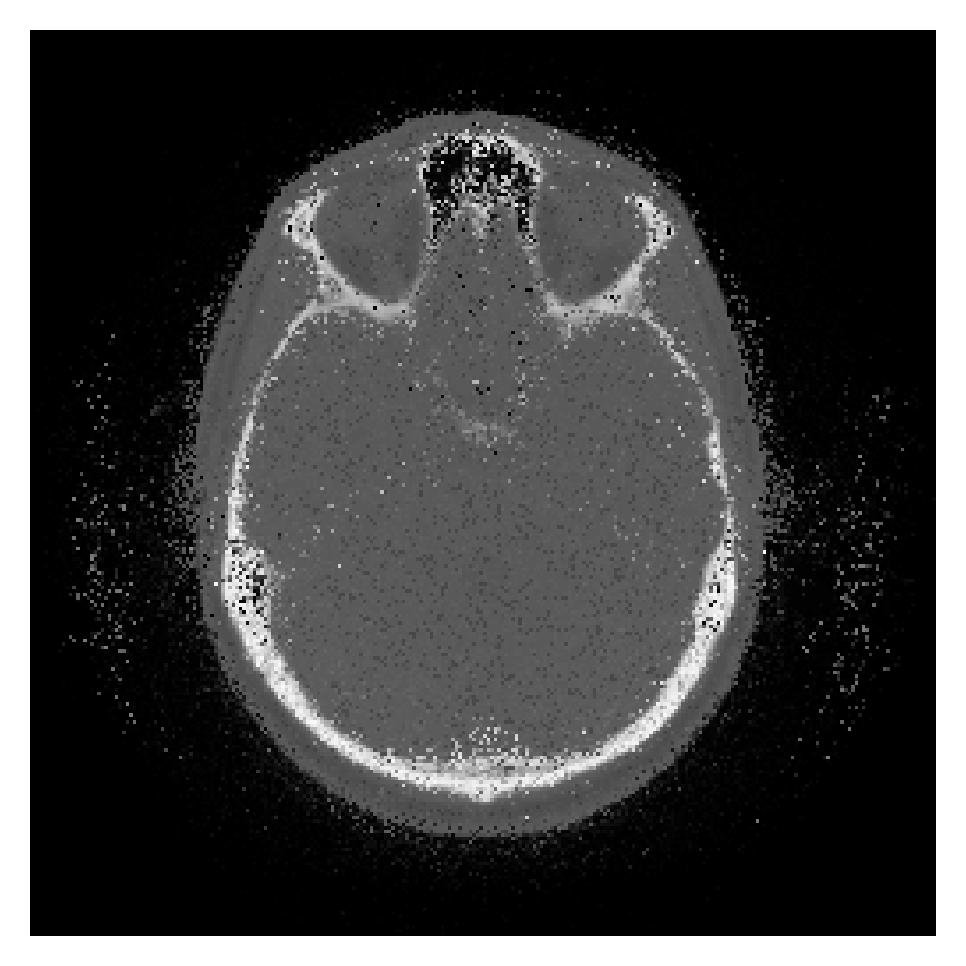

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4), dpi=300)
plt.imshow(np.rot90(pred[:, :, 45]), cmap='gray')
plt.axis("off")

# post-processing

In [43]:
import copy

img = pred[:, :, 45]
median_img = copy.deepcopy(img)

for ix in range(256-2):
    for iy in range(256-2):
        # the outer boundary
        idx = ix+1
        idy = iy+1
        target = img[idx, idy]
        neighborhood = np.ravel(img[idx-1:idx+2, idy-1:idy+2])
        median_img[idx, idy] = np.median(neighborhood)
        
#         loc_target = np.where(neighborhood==target)[0]
#         if 0 in loc_target or 8 in loc_target:
#             print(idx, idy, loc_target, np.median(neighborhood))
#             median_img[idx, idy] = np.median(neighborhood)

In [42]:
idx = 10
idy = 119
target = img[idx, idy]
neighborhood = np.ravel(img[idx-1:idx+2, idy-1:idy+2])
loc_target = np.where(neighborhood==target)[0]
print(target, neighborhood, loc_target)

1.0 [1. 0. 2. 0. 1. 0. 0. 0. 0.] [0 4]


(-0.5, 255.5, 255.5, -0.5)

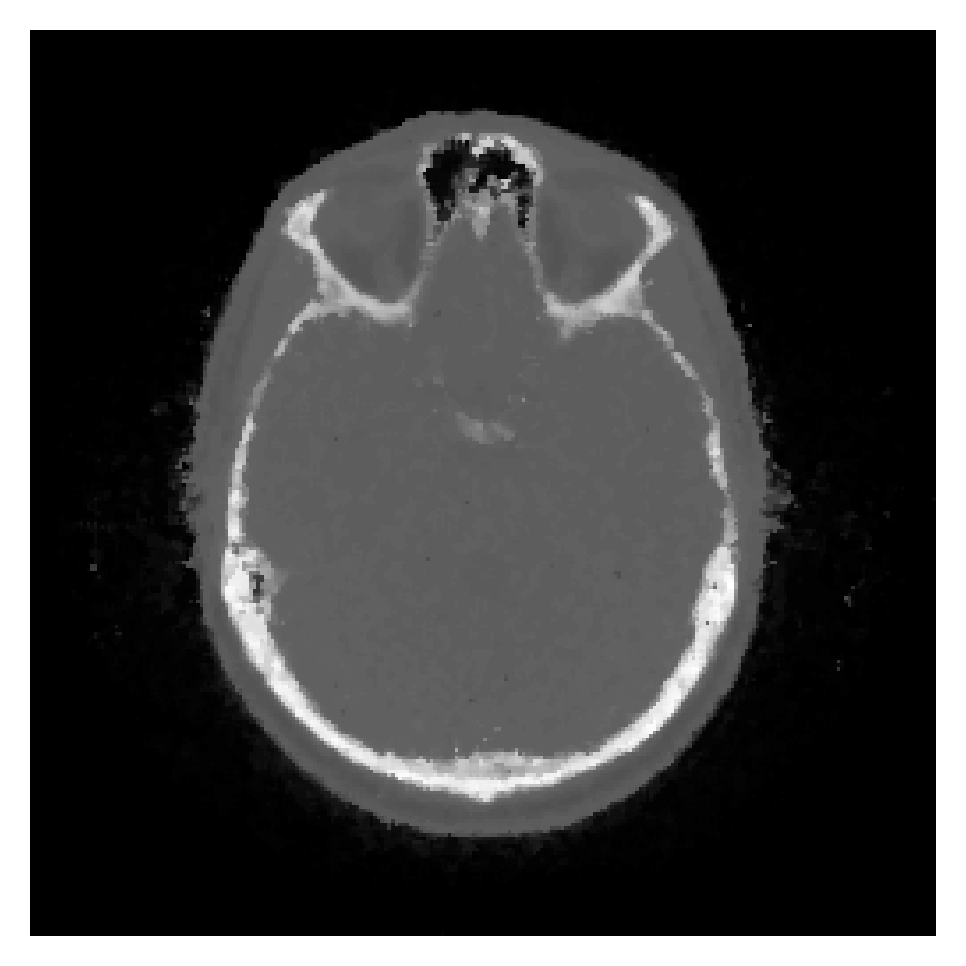

In [44]:
plt.figure(figsize=(4,4), dpi=300)
plt.imshow(np.rot90(median_img), cmap='gray')
plt.axis("off")

In [ ]:
for ix in range(n_bin):
        temp_sum = np.sum(pixel_corr[ix, :])
        # print(np.amax(pixel_corr[ix, :]), end="")
        if not temp_sum == 0.0:
            pixel_corr[ix, :] = pixel_corr[ix, :] / np.sum(pixel_corr[ix, :])
        # print(np.amax(pixel_corr[ix, :]))
            
    loc_x = np.zeros((n_bin)*(n_bin))
    loc_y = np.zeros((n_bin)*(n_bin))
    pc_ft = np.zeros((n_bin)*(n_bin))
    for idx in range(n_bin):
        for idy in range(n_bin):
            flatten = idx*n_bin + idy
            loc_x[flatten] = idx
            loc_y[flatten] = idy
            pc_ft[flatten] = pixel_corr[idx, idy]

    corr_mat = pd.DataFrame({"X":loc_x, "Y":loc_y, "counts":pc_ft})

    plt.figure(figsize=(12, 12), dpi=1200)
    g = sns.relplot(
        data=corr_mat,
        x="X", y="Y", hue="counts",
        palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
        height=10, sizes=(50, 250), size_norm=(-.2, .8),
    )

    # Tweak the figure to finalize
    g.set(xlabel="MR", ylabel="CT", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.02)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)
    for artist in g.legend.legendHandles:
        artist.set_edgecolor(".7")
        
    np.save(train_dict["save_folder"]+file_name[:-7]+"_pix_cor.npy", pixel_corr)
    plt.savefig(train_dict["save_folder"]+file_name[:-7]+"_pix_cor.png")
    plt.close('all')

    pred_file = nib.Nifti1Image(X_discrete, nib.load(cube_x_path).affine, nib.load(cube_x_path).header)
    pred_name = "./data_dir/norm_MR/discrete/"+file_name[:-7]+"_MR_D.nii.gz"
    nib.save(pred_file, pred_name)
    
    pred_file = nib.Nifti1Image(Y_discrete, nib.load(cube_y_path).affine, nib.load(cube_y_path).header)
    pred_name = "./data_dir/norm_CT_2/discrete/"+file_name[:-7]+"_CT_D.nii.gz"
    nib.save(pred_file, pred_name)